In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7962 entries, 0 to 7961
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   0                   7501 non-null   float64
 1   1                   7472 non-null   float64
 2   2                   7359 non-null   float64
 3   3                   7556 non-null   float64
 4   4                   7495 non-null   float64
 5   brand               7962 non-null   object 
 6   model               7962 non-null   object 
 7   trim                7951 non-null   object 
 8   body_type           7962 non-null   object 
 9   fuel_type           7962 non-null   object 
 10  transmission_type   7962 non-null   object 
 11  engine_capacity_cc  6362 non-null   object 
 12  horsepower          7584 non-null   object 
 13  exterior_color      7962 non-null   object 
 14  interior_color      7962 non-null   object 
 15  warranty            7962 non-null   obj

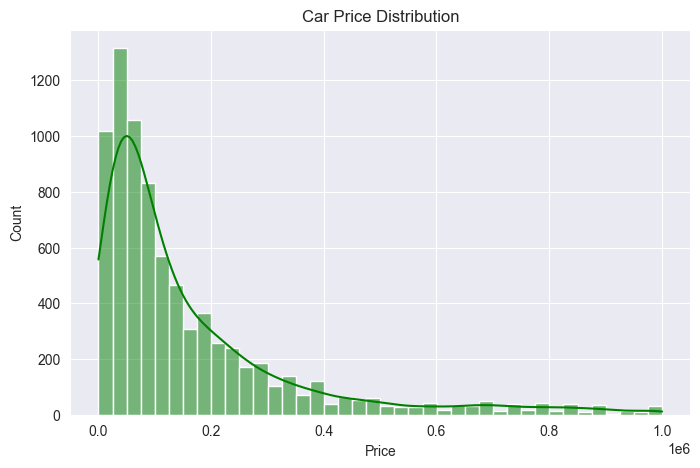

In [2]:
df = pd.read_csv("../data/topic21_v23_train.csv")

print("🔍 Dataset Info:")
print(df.info())
print("\n📄 First few rows:")
print(df.head())

plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True, color='green', bins=40)
plt.title('Car Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.grid(True)
plt.show()



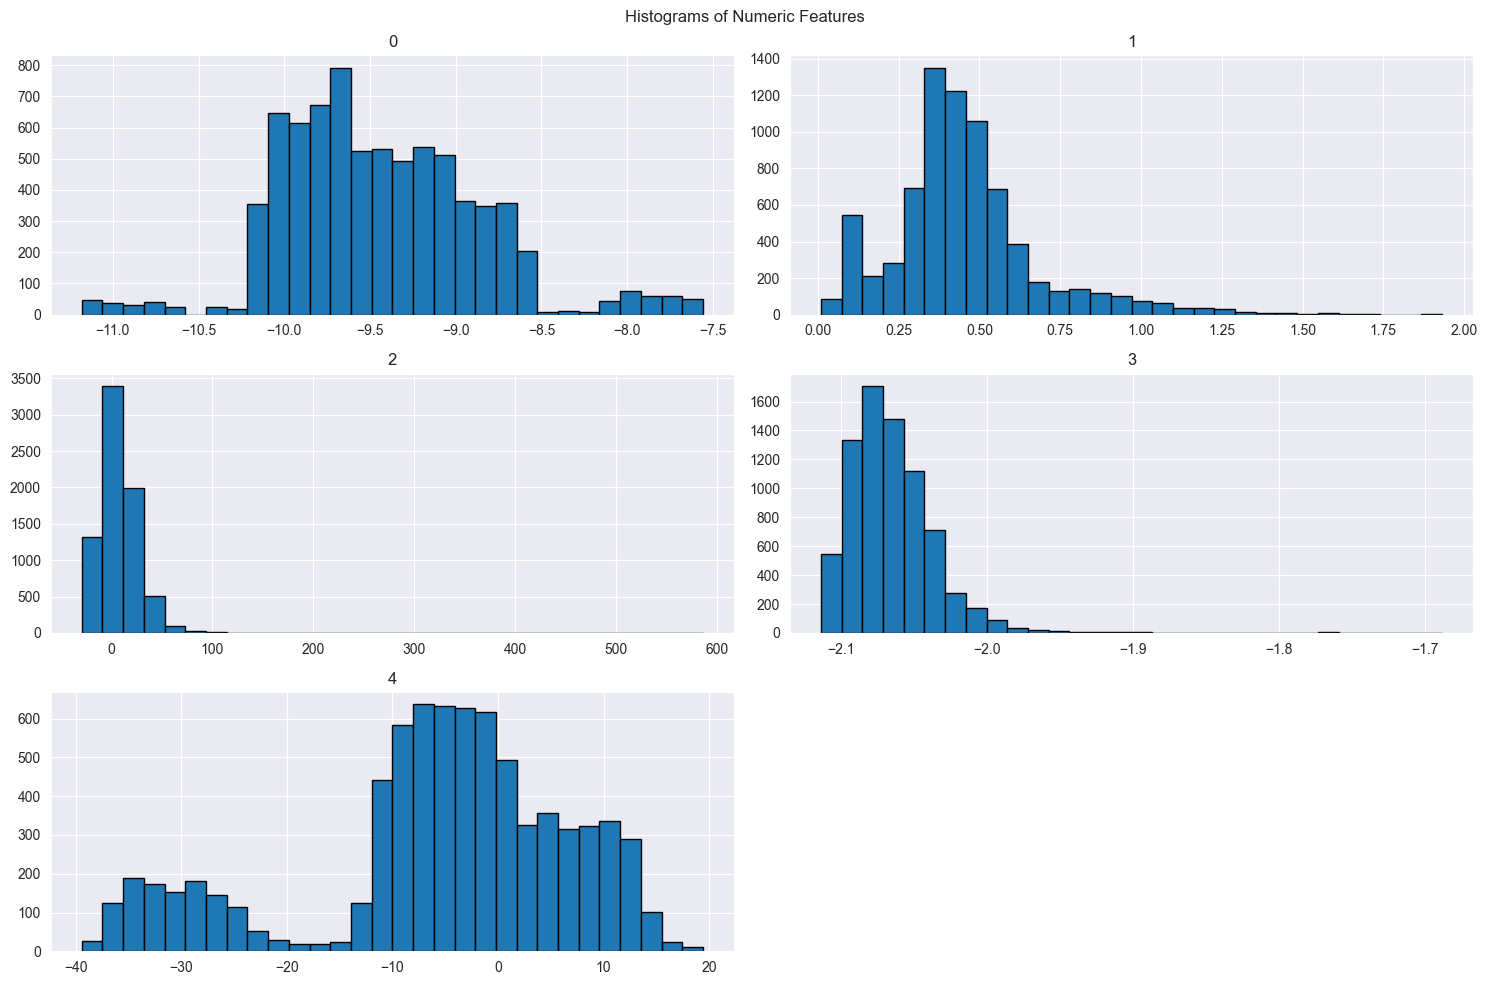

In [3]:
numeric_cols = df.select_dtypes(include='number').columns.drop('price', errors='ignore')

df[numeric_cols].hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle('Histograms of Numeric Features')
plt.tight_layout()
plt.show()

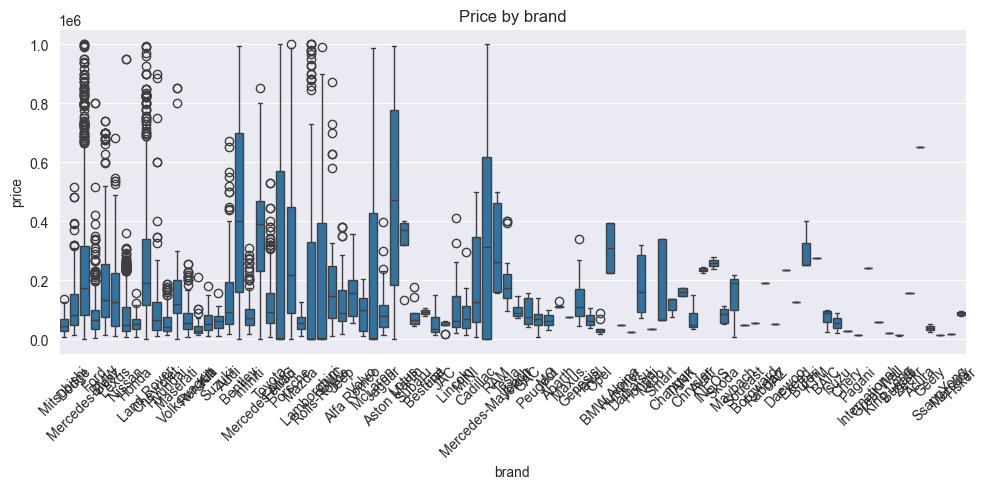

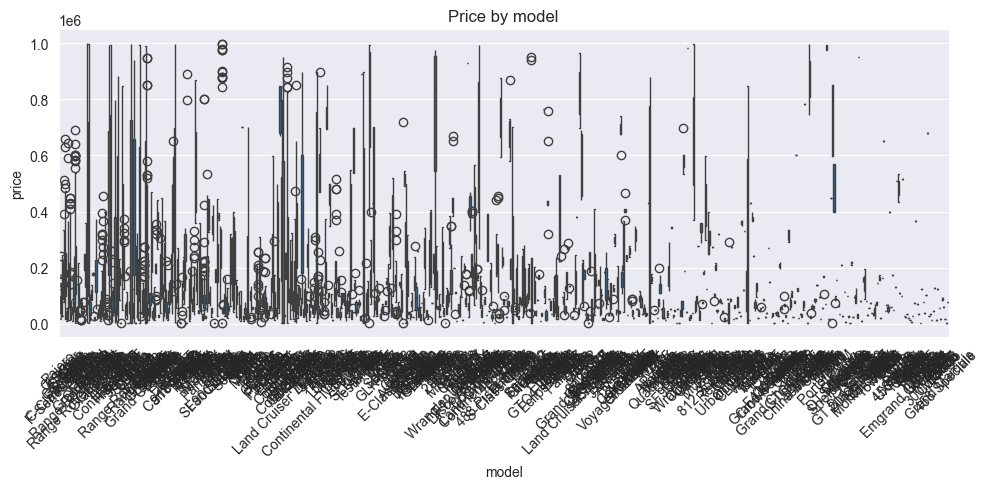

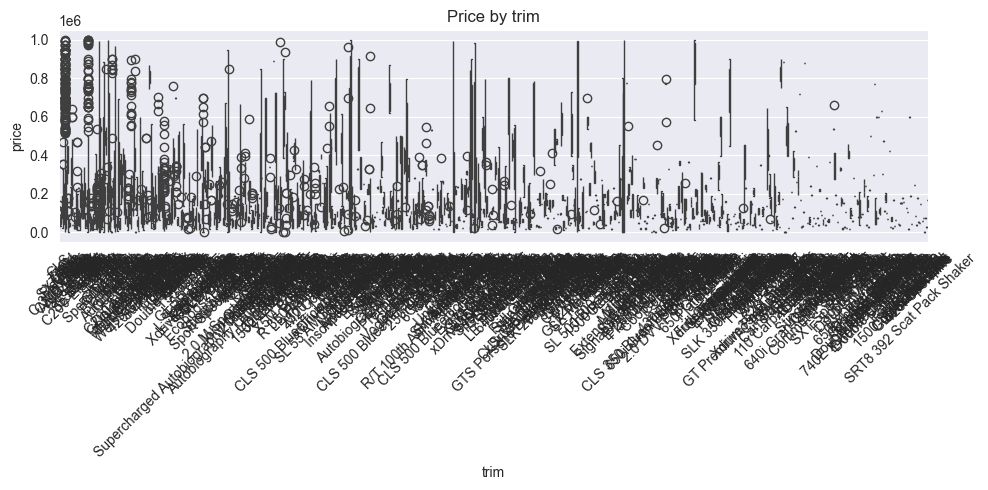

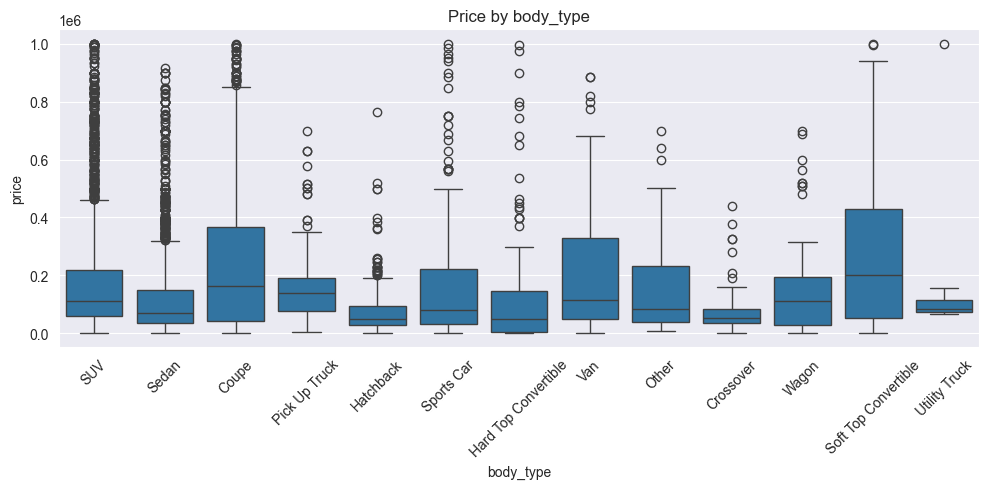

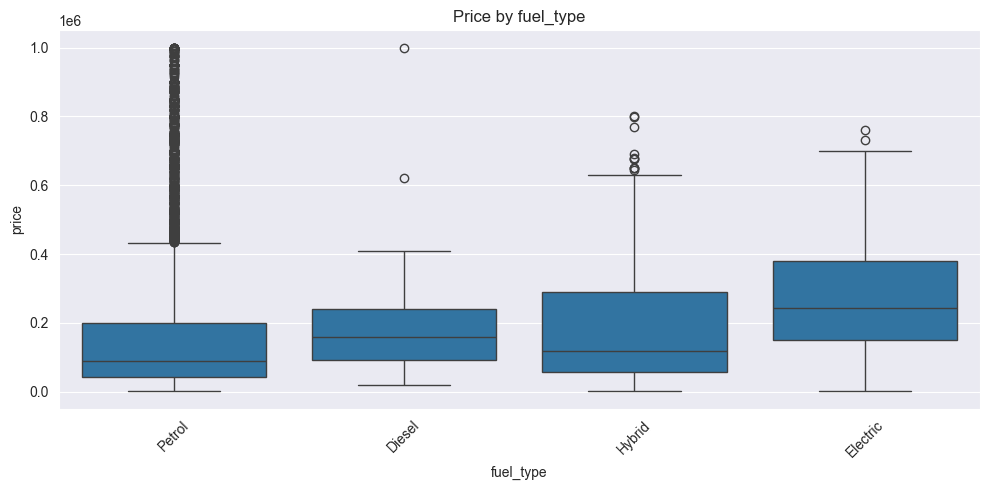

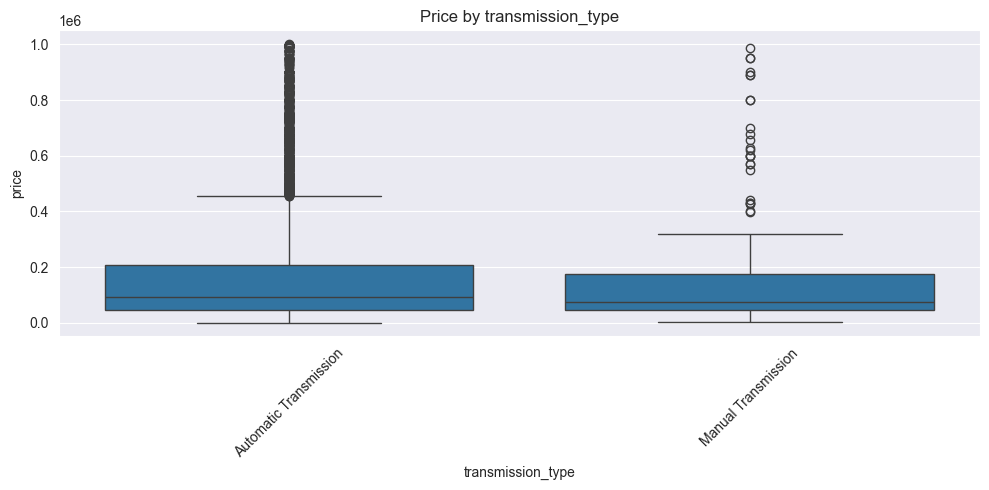

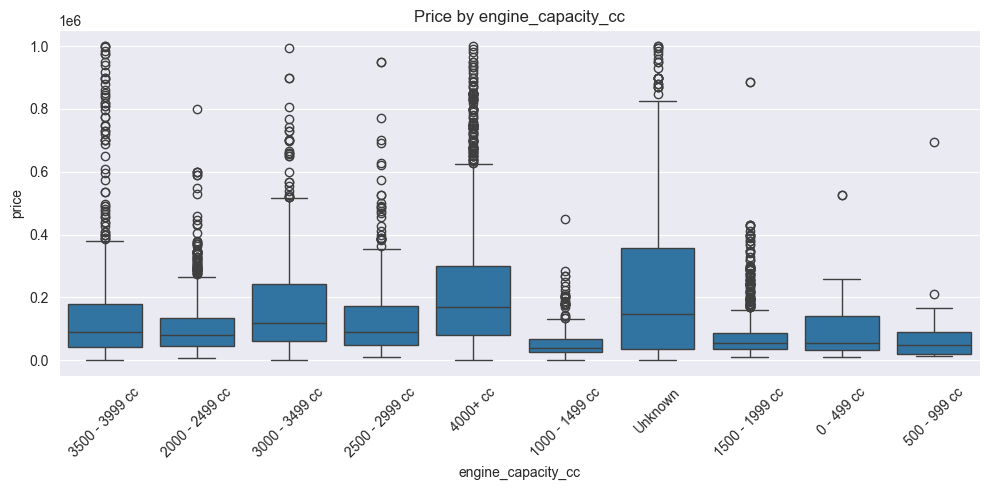

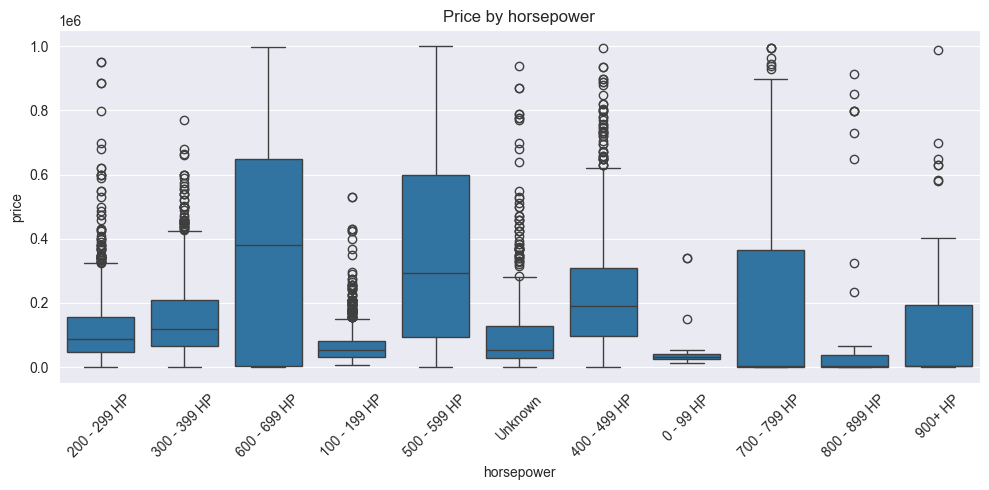

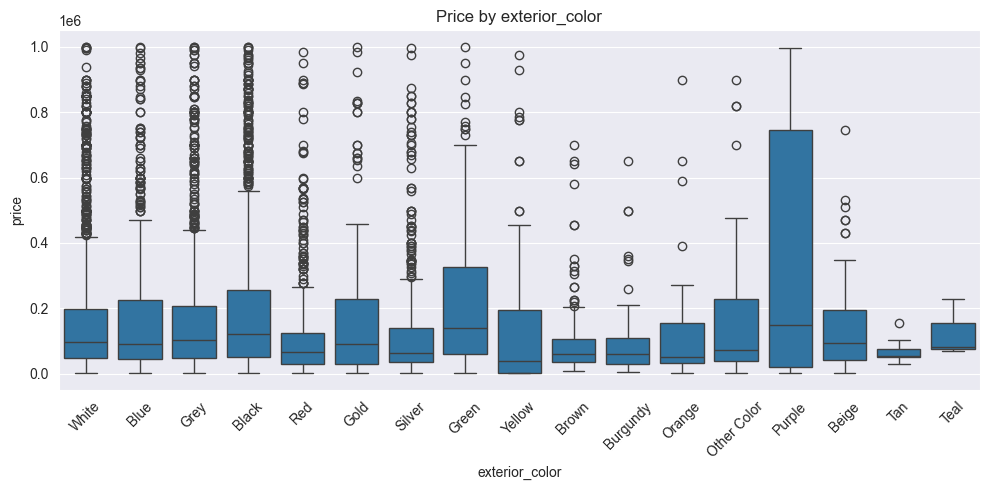

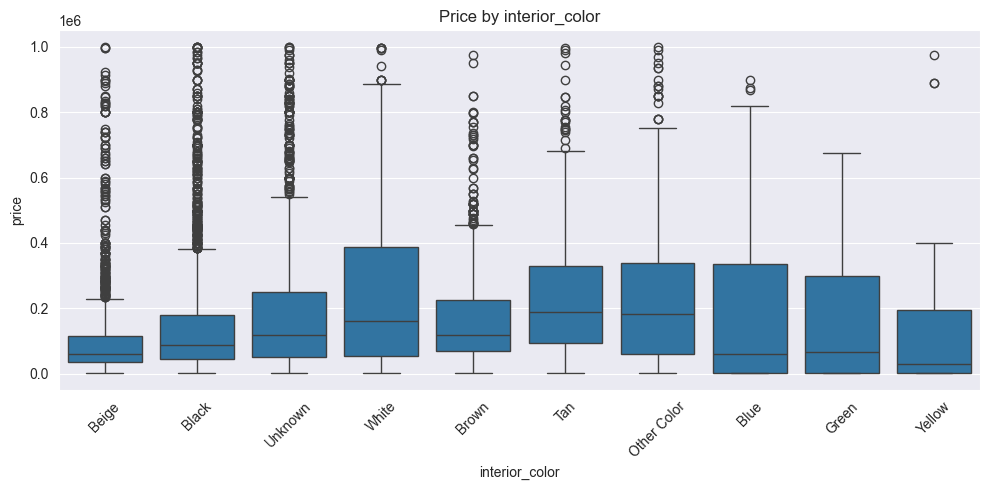

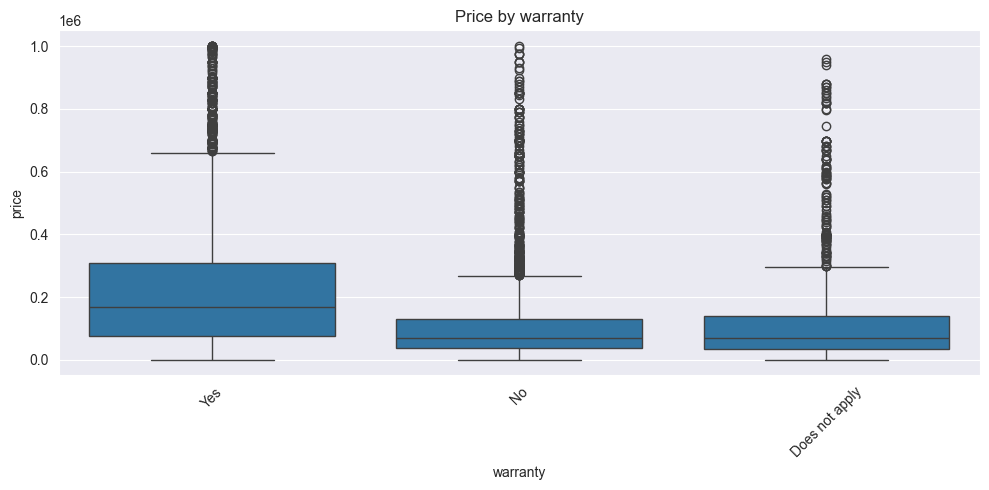

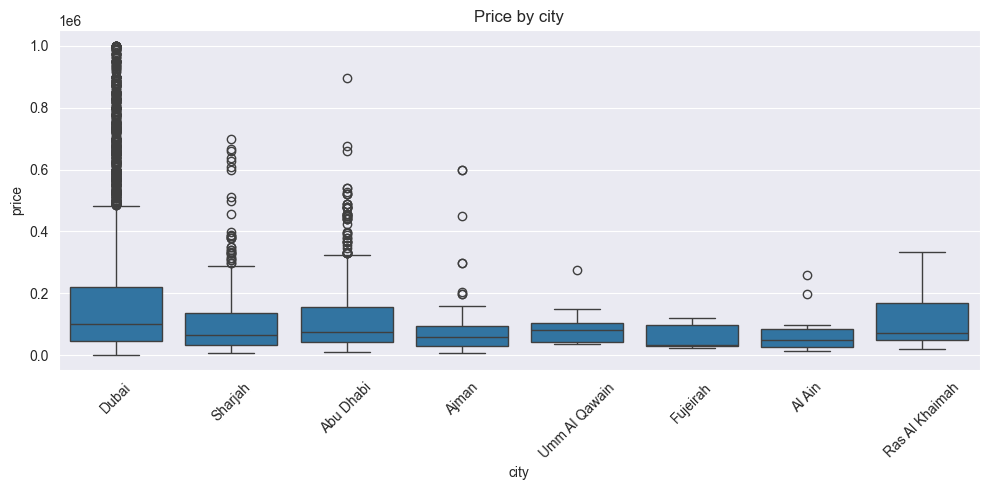

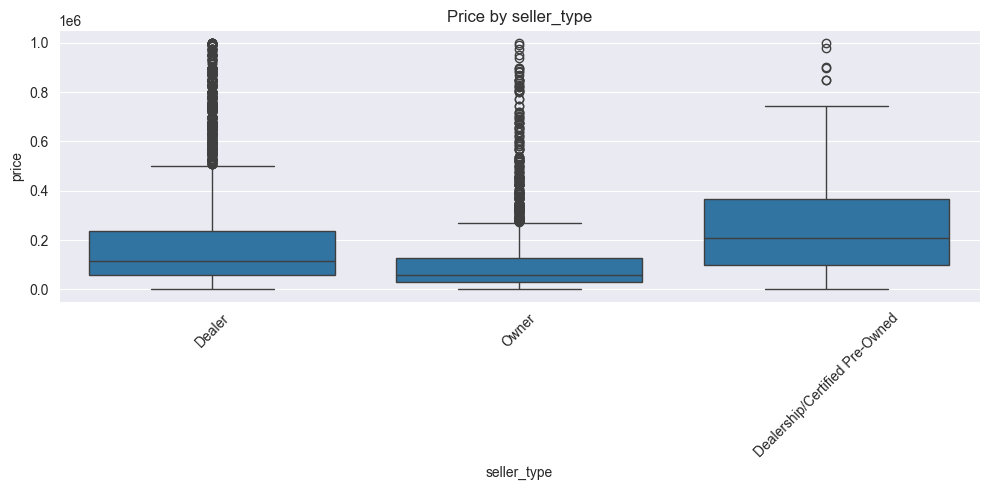

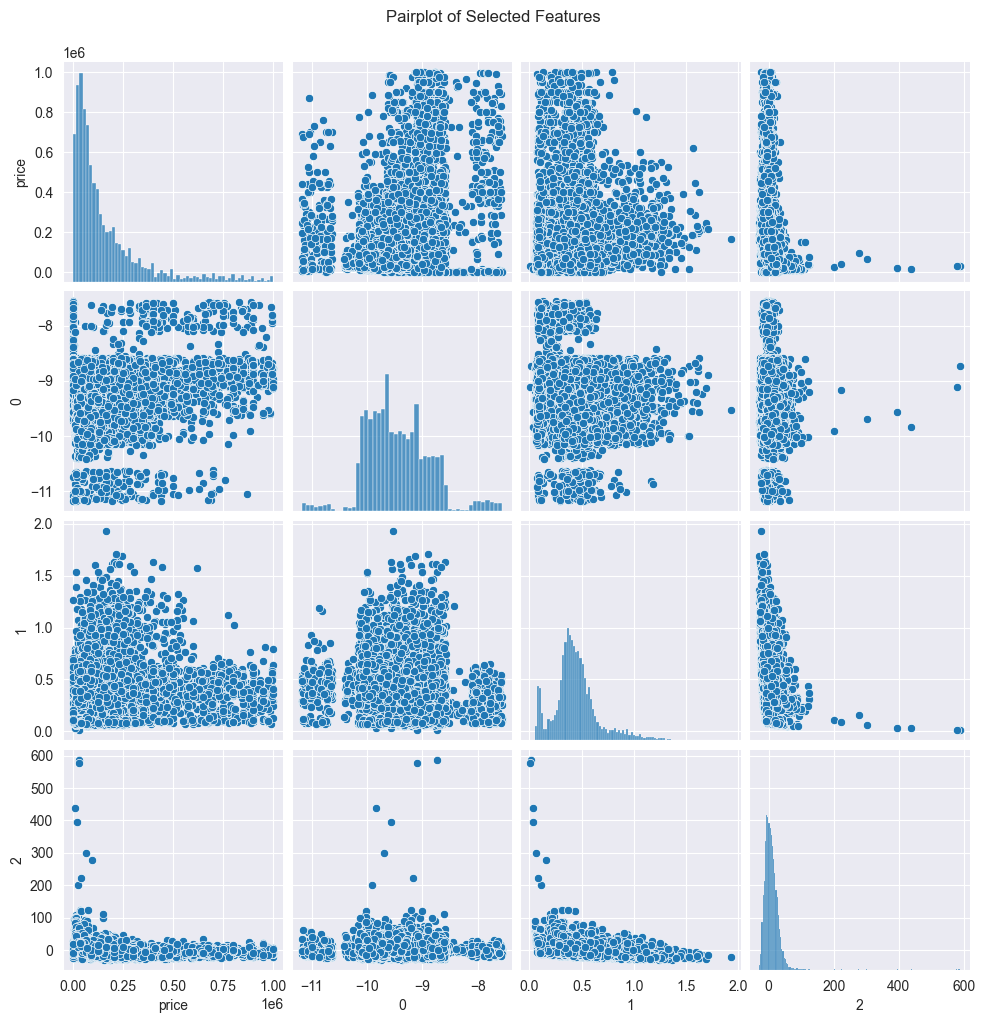

In [4]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=col, y='price', data=df)
    plt.xticks(rotation=45)
    plt.title(f'Price by {col}')
    plt.tight_layout()
    plt.show()

selected_cols = ['price'] + list(numeric_cols[:3])
sns.pairplot(df[selected_cols])
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

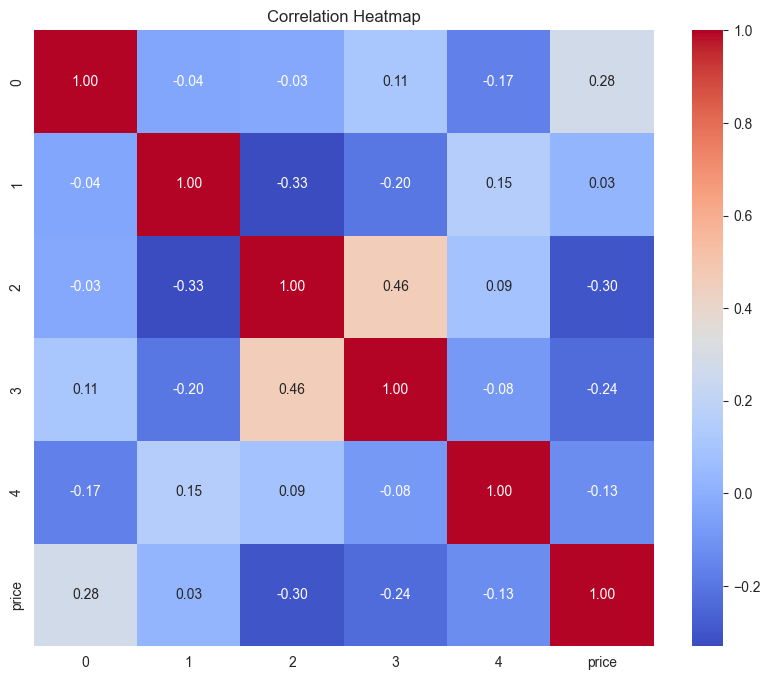

In [5]:
plt.figure(figsize=(10, 8))
correlation = df[numeric_cols.union(['price'])].corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()